In [1]:
%matplotlib inline
# %matplotlib widget
import numpy as np
# import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
# import matplotlib as mpl
# from ipywidgets import interact, IntSlider, Button
# from ipywidgets import interact_manual

In [2]:
def Graph_Partition_to_two(len_of_data, edge):
    if len_of_data <= 0 or not edge:
        return None, None
    graph = np.arange(len_of_data)
    
    # ensure it is connected
    nbhd = {k: [] for k in range(len_of_data)}
    for k in range(len_of_data):
        for i,j in edge:
            if k == i:
                nbhd[k].append(j)
            elif k == j:
                nbhd[k].append(i)

    used = [False] * len_of_data
    def dfs(v):
        used[v] = True
        for to in nbhd[v]:
            if not used[to]:
                dfs(to)
        return used
    component = graph[dfs(0)]
    if len(component) != len_of_data:
        print("the graph is not connected!")
        return component, None

    Adjacency = np.array([[1. if [i,j] in edge or [j,i] in edge else 0. for i in range(len_of_data)] for j in range(len_of_data)])
    Laplacian = np.diag(np.sum(Adjacency, axis=0)) - Adjacency
    w, v = np.linalg.eigh(Laplacian)
    for i in range(len(w)):
        if round(w[i], 8) != 0:
            # print(i, w[i], v[:,i])
            break
    c = v[:, i]
    return graph[c>=0], graph[c<0]

In [3]:
len_of_data = 30*2

edge_rate = 0.2
from random import shuffle
edge = [[i,j] for j in range(len_of_data//2) for i in range(j)] # complete graph
X = np.array([True] * int(len(edge) * edge_rate) + [False] * (len(edge) - int(len(edge) * edge_rate)))
shuffle(X)
shuffle(X)
edge = list(np.array(edge)[X]) # delete some edge
for i in range(len(edge)):
    edge[i] = list(edge[i])

edge = edge + [[i,i+1] for i in range(len_of_data//2-1)] # ensure the graph is connected
def duplicate(items):
    unique = []
    for item in items:
        if item not in unique:
            unique.append(item)
    return unique
edge = duplicate(edge)


edge1_rate = 0.15
edge1 = [[i,j] for j in range(len_of_data//2) for i in range(j)] # complete graph
X = np.array([True] * int(len(edge1) * edge1_rate) + [False] * (len(edge1) - int(len(edge1) * edge1_rate)))
shuffle(X)
edge1 = list(np.array(edge1)[X]) # delete some edge
for i in range(len(edge1)):
    edge1[i] = list(edge1[i])
edge1 = duplicate(edge1 + [[i,i+1] for i in range(len_of_data//2-1)]) # ensure the graph is connected
edge1 = list(np.array(edge1) + len_of_data//2)
for i in range(len(edge1)):
    edge1[i] = list(edge1[i])

edge = edge + edge1
for i in range(int(len_of_data * 0.4) + 1):
    single_random_edge = [np.random.randint(len_of_data//2), np.random.randint(len_of_data//2)+ len_of_data//2]
    if not single_random_edge in edge:
        edge = edge + [single_random_edge]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 55]
[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 56 57 58 59]


c:\users\奎佑\appdata\local\programs\python\python36\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


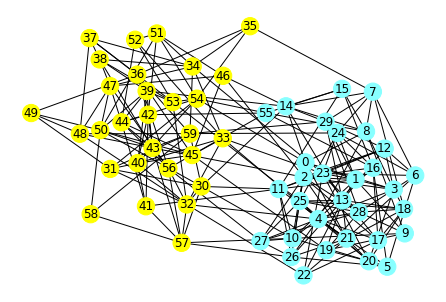

In [4]:
a, b = Graph_Partition_to_two(len_of_data, edge)
print(a)
print(b)

Adjacency = np.array([[1. if [i,j] in edge or [j,i] in edge else 0. for i in range(len_of_data)] for j in range(len_of_data)])
color = ['yellow'] * len_of_data
for i in a:
    color[i] = '#88FFFF'

G = nx.from_numpy_matrix(Adjacency)
nx.draw(G, node_color = color, with_labels = True)
plt.show()